<a href="https://colab.research.google.com/github/massimocipressi/MLPNS_MCipressi/blob/main/vis/tSNEhiggs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import json
import os
import pylab as pl
%pylab inline

- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here 


In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cd /content/drive/My Drive/MLPNS2023

/content/drive/My Drive/MLPNS2023


In [ ]:
#delete
envs = json.load(open("../.kaggle/kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
os.environ["KAGGLE_USERNAME"]

'fedhere'

In [ ]:
#delete
#!rm -r higgsb
#!mkdir higgsb



In [ ]:
cd higgsb/


/content/drive/My Drive/MLPNS2023/higgsb


In [ ]:
!pwd

/content/drive/MyDrive/MLPNS2023/higgsb


In [ ]:
# already done#!kaggle competitions download -c higgs-boson


In [ ]:
#!unzip test.zip 
#!unzip training.zip

In [ ]:
data = pd.read_csv("training.csv")


In [ ]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


<ipython-input-18-2cc9efcead98>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  pl.figure()


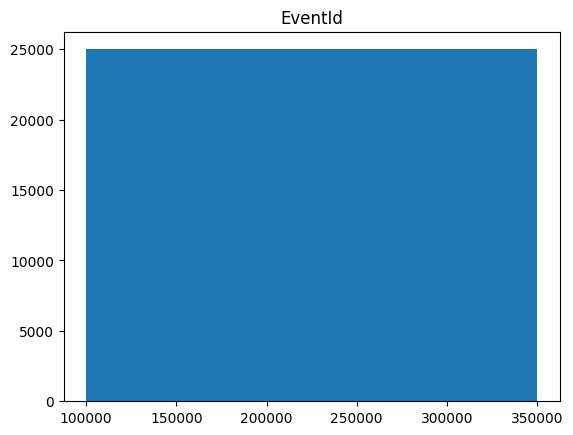

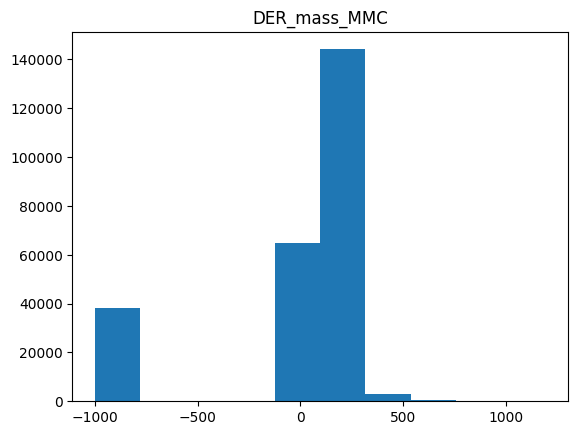

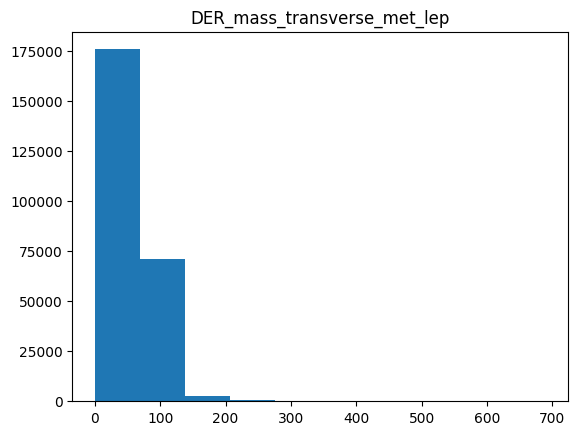

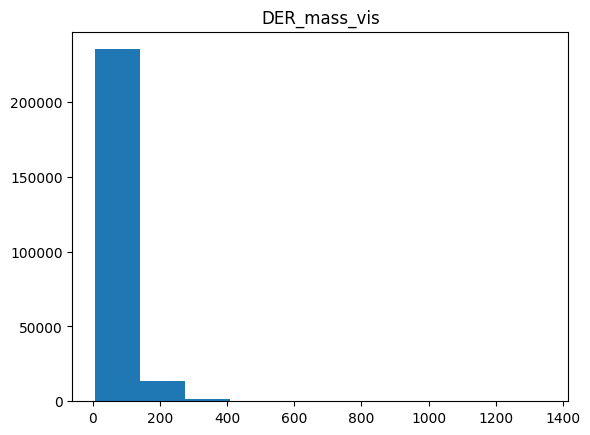

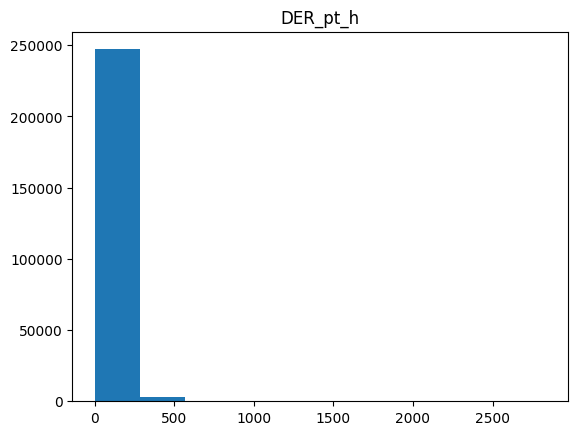

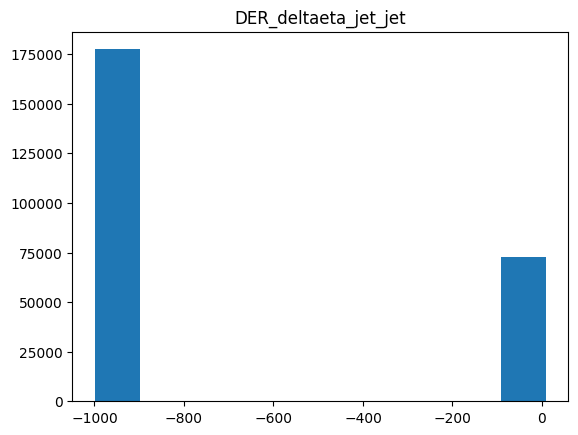

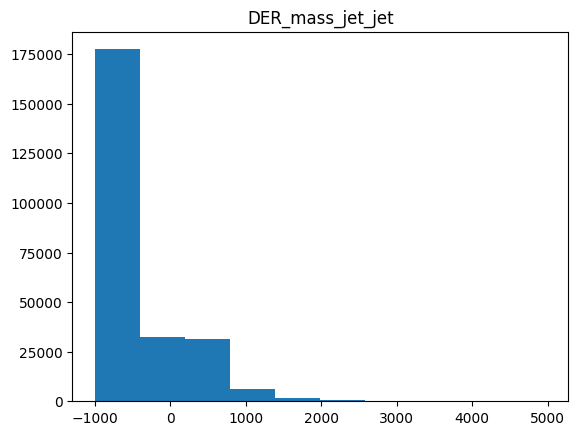

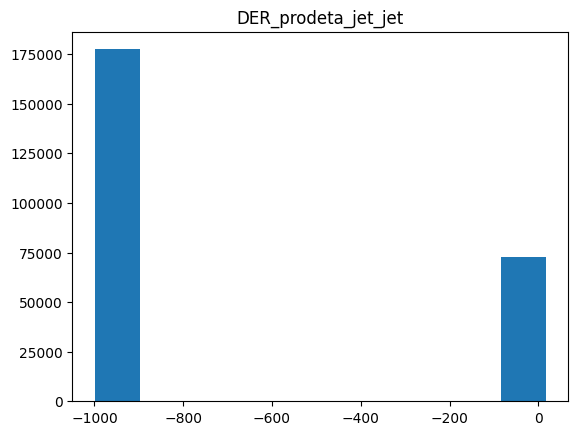

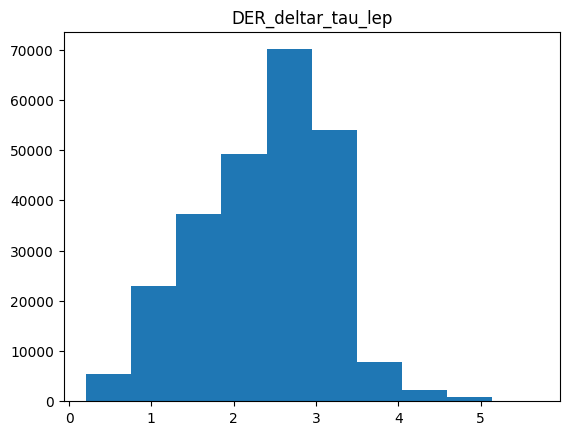

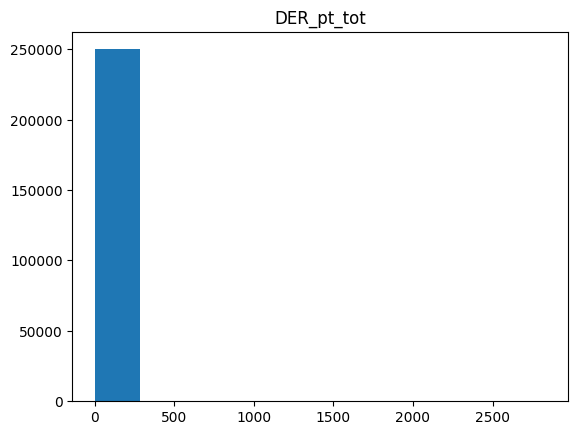

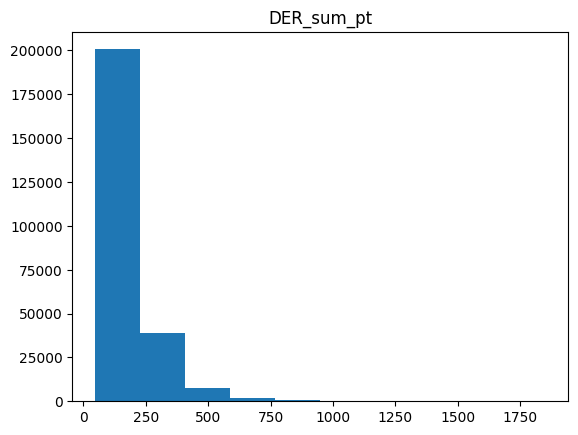

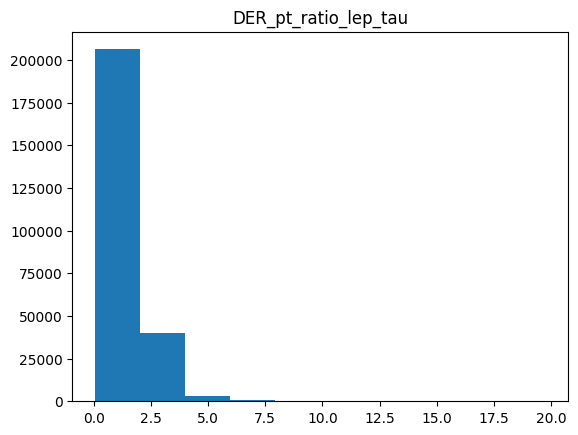

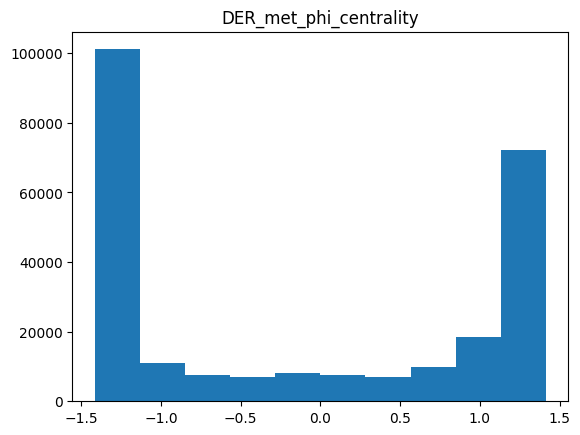

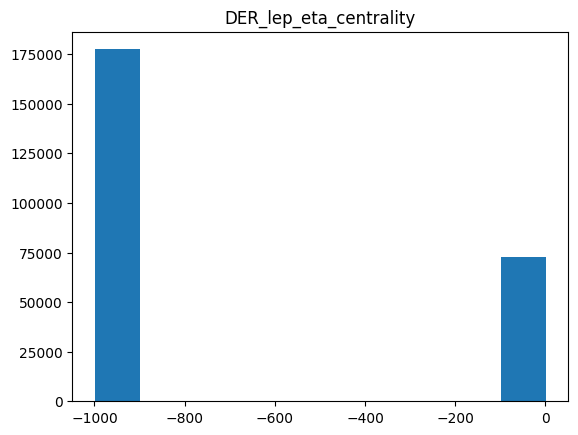

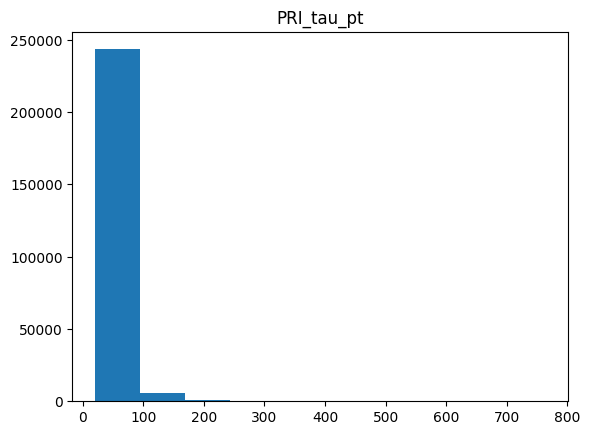

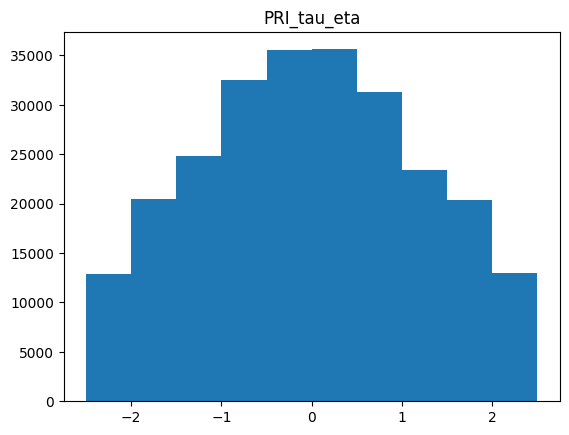

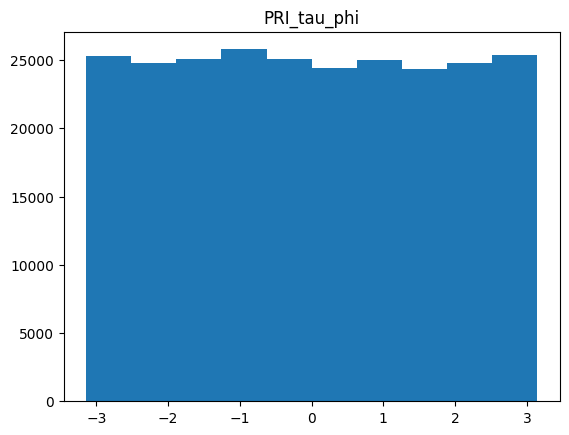

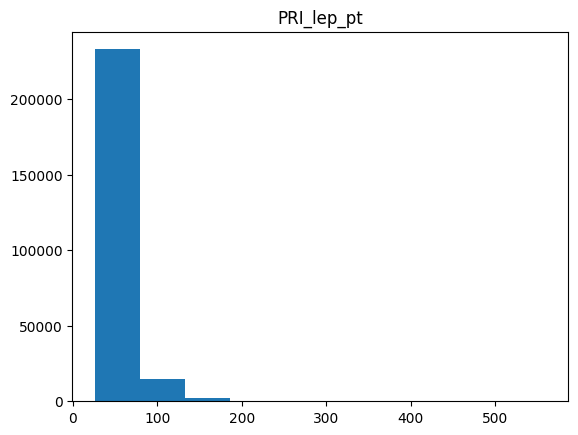

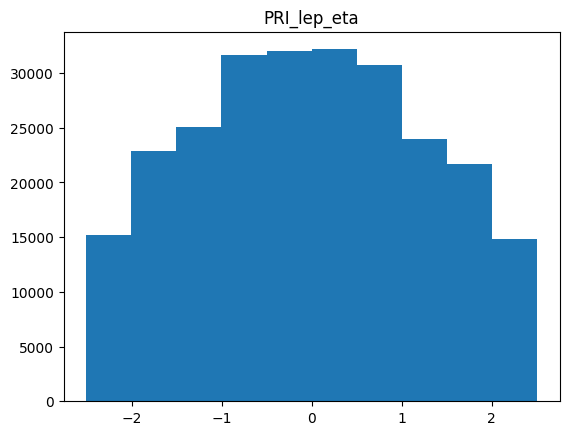

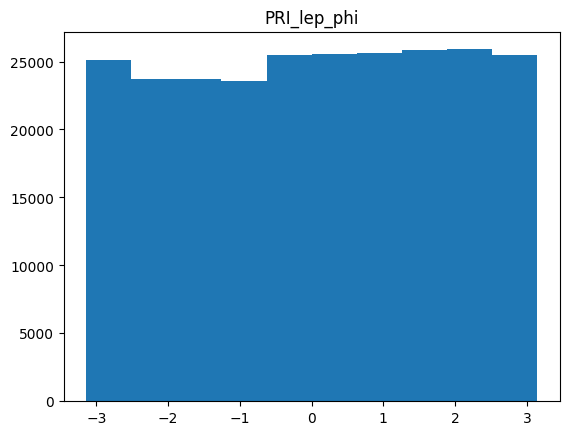

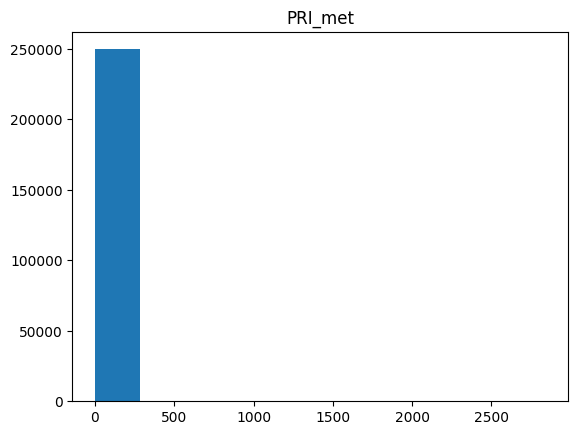

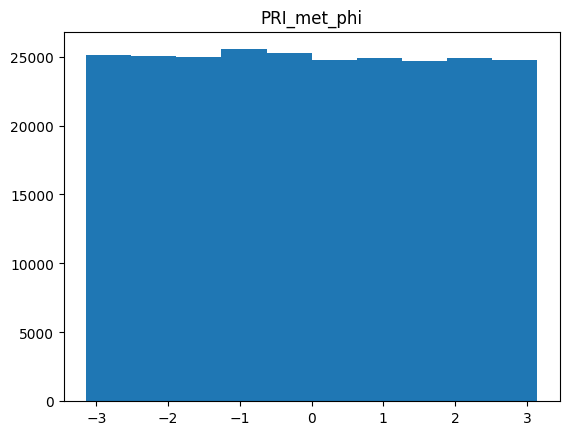

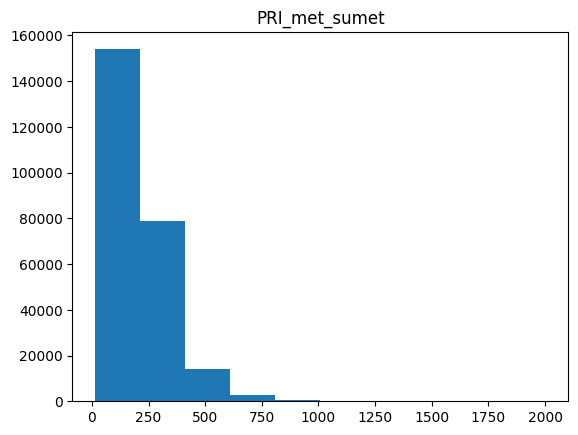

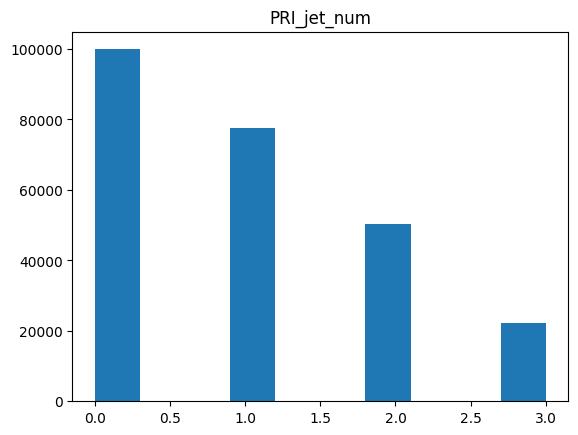

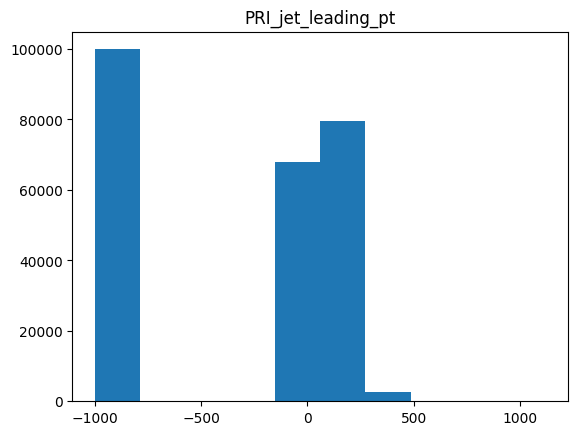

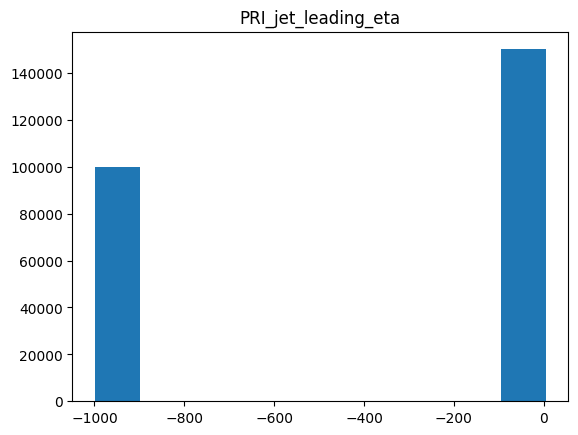

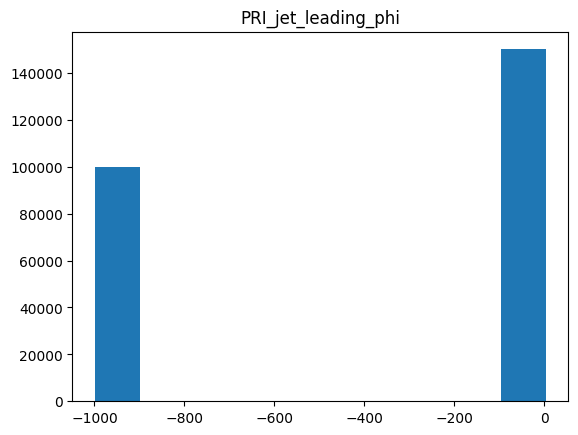

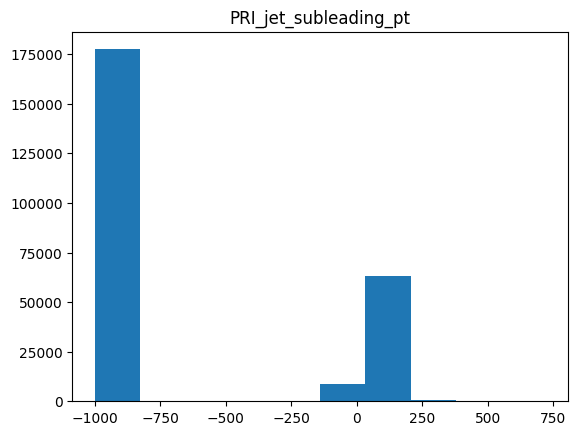

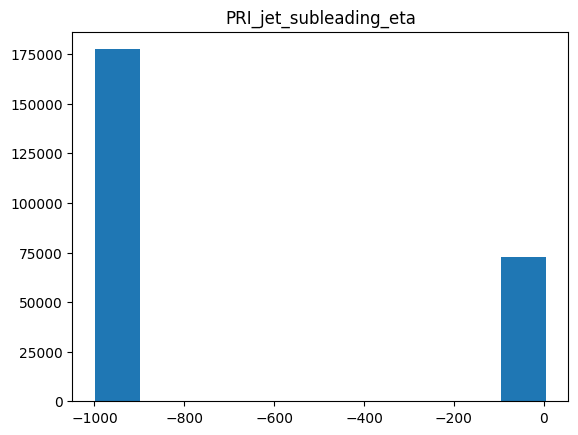

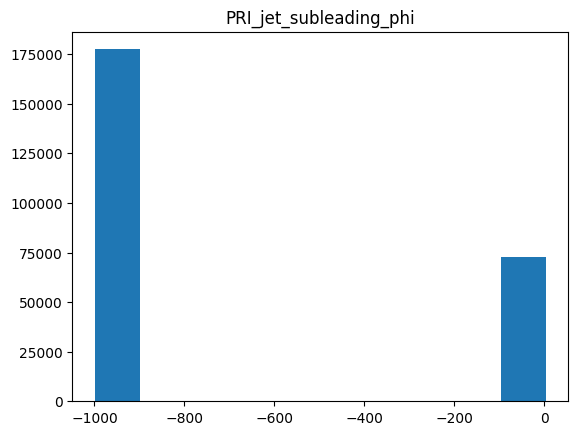

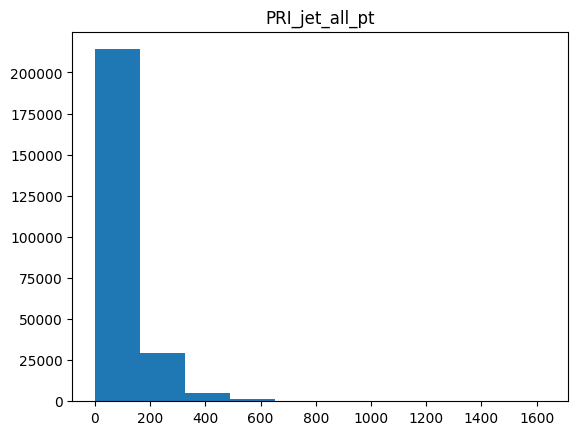

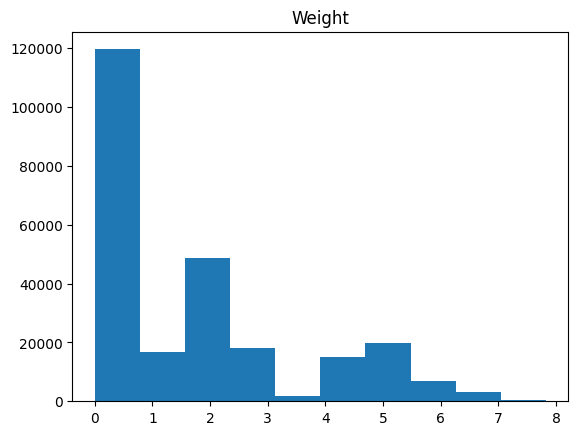

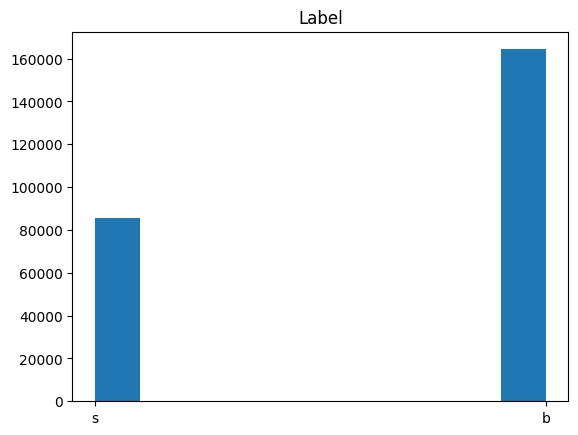

In [ ]:
for c in data.columns:
  pl.figure()
  pl.hist(data[c])
  pl.title(c)

In [ ]:
higgsWnan = data.replace(-999.0, np.nan)

In [ ]:
higgsWnan.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,211886.000000,250000.000000,250000.000000,250000.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,150087.000000,150087.000000,150087.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000
mean,224999.500000,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,...,209.797178,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591,1.646767
std,72168.927986,57.298157,35.344886,40.828691,63.655682,1.742226,397.699325,3.584362,0.782911,22.273494,...,126.499506,0.977426,60.662276,1.784546,1.813385,31.985782,2.031743,1.816950,98.015662,1.875103
min,100000.000000,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,...,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000,0.001502
25%,162499.750000,91.885250,19.241000,59.388750,14.068750,0.882500,111.977000,-2.629000,1.810000,2.841000,...,123.017500,0.000000,44.422500,-1.342000,-1.584000,37.312000,-1.612000,-1.576500,-0.000000,0.018636
50%,224999.500000,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,...,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500,1.156188
75%,287499.250000,135.482000,73.598000,92.259000,79.169000,3.690000,478.226000,0.958000,2.961000,27.591000,...,263.379250,2.000000,103.342000,1.336000,1.562000,66.637000,1.589500,1.576000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
#remove 2 columns with lots of nans
higgsclean = higgsWnan.drop(["PRI_jet_leading_pt","PRI_jet_leading_eta","PRI_jet_leading_phi"], axis=1)

In [ ]:
higgsclean.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,211886.000000,250000.000000,250000.000000,250000.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000
mean,224999.500000,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,...,0.043543,41.717235,-0.010119,209.797178,0.979176,57.679474,-0.011845,-0.001582,73.064591,1.646767
std,72168.927986,57.298157,35.344886,40.828691,63.655682,1.742226,397.699325,3.584362,0.782911,22.273494,...,1.816611,32.894693,1.812223,126.499506,0.977426,31.985782,2.031743,1.816950,98.015662,1.875103
min,100000.000000,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,...,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.500000,-3.142000,0.000000,0.001502
25%,162499.750000,91.885250,19.241000,59.388750,14.068750,0.882500,111.977000,-2.629000,1.810000,2.841000,...,-1.522000,21.398000,-1.575000,123.017500,0.000000,37.312000,-1.612000,-1.576500,-0.000000,0.018636
50%,224999.500000,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,...,0.086000,34.802000,-0.024000,179.739000,1.000000,47.902000,-0.010000,-0.002000,40.512500,1.156188
75%,287499.250000,135.482000,73.598000,92.259000,79.169000,3.690000,478.226000,0.958000,2.961000,27.591000,...,1.618000,51.895000,1.561000,263.379250,2.000000,66.637000,1.589500,1.576000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.142000,2842.617000,3.142000,2003.976000,3.000000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
higgsclean = higgsclean.dropna()
higgsclean.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,...,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000
mean,225035.224154,122.816184,35.270300,78.496815,111.430393,2.434232,378.176455,-0.881020,1.996525,27.356644,...,0.041897,54.959294,0.006987,334.677667,2.303711,57.915426,-0.012930,-0.004782,183.374631,0.445788
std,72243.940540,60.751559,30.750262,40.728784,76.318688,1.750700,400.784254,3.592624,0.774636,28.266913,...,1.815463,42.690672,1.813892,139.867044,0.459863,32.224318,2.044065,1.817247,108.312736,0.747552
min,100000.000000,9.878000,0.000000,7.330000,0.120000,0.000000,13.602000,-18.066000,0.228000,0.004000,...,-3.142000,0.200000,-3.142000,34.323000,2.000000,30.000000,-4.500000,-3.142000,60.223000,0.001502
25%,162349.750000,93.320250,11.320000,57.274250,57.827000,0.897000,113.463000,-2.729000,1.397000,4.218000,...,-1.518000,27.081000,-1.550000,239.168250,2.000000,37.392250,-1.628750,-1.579000,109.472000,0.001503
50%,225288.000000,113.230000,26.964000,70.930000,94.714000,2.146500,232.370500,-0.284000,1.940000,22.542000,...,0.077000,44.292000,0.005000,305.170000,2.000000,48.105500,-0.014000,-0.008000,154.136500,0.064061
75%,287772.750000,133.455750,52.202750,88.372000,145.824750,3.741000,489.447750,0.921000,2.574000,39.067750,...,1.609000,69.416250,1.573000,396.382500,3.000000,66.946500,1.604000,1.573000,223.595250,0.744056
max,349994.000000,988.199000,594.287000,789.538000,1053.807000,8.503000,4974.979000,16.648000,5.579000,466.525000,...,3.141000,951.363000,3.142000,2003.976000,3.000000,721.456000,4.500000,3.142000,1633.433000,7.805035


<ipython-input-24-842bccb541c4>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  pl.figure()


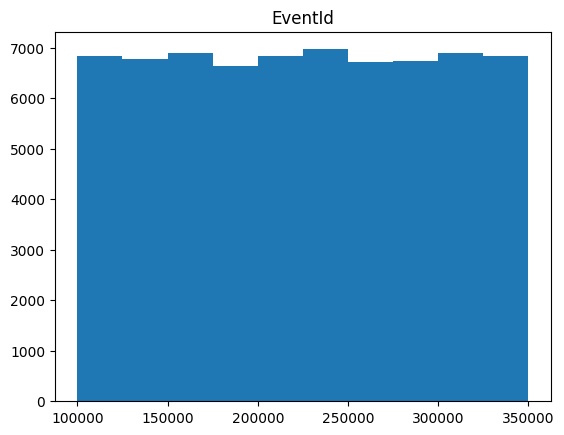

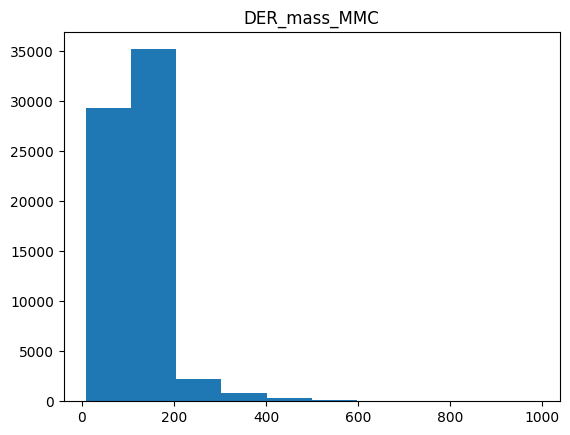

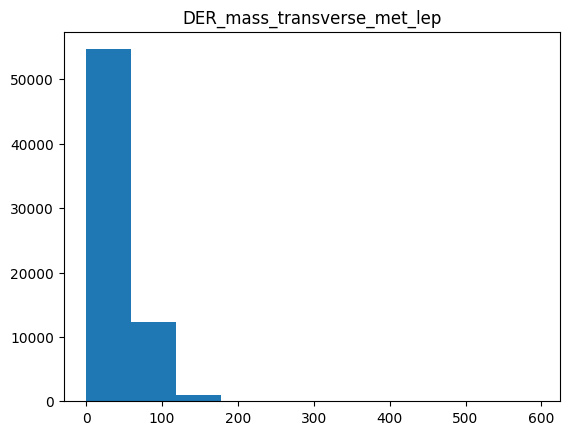

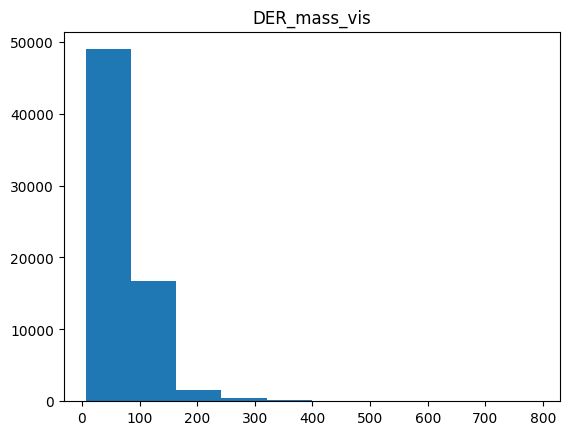

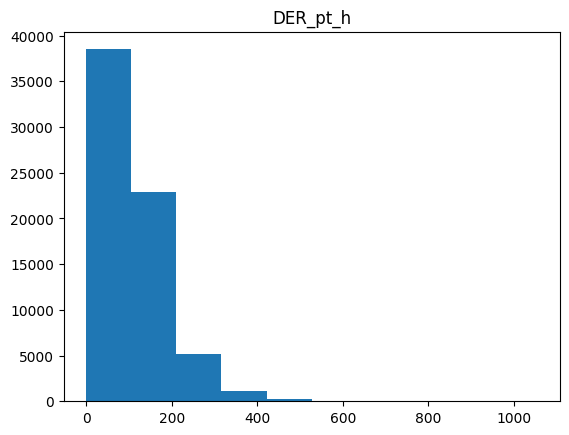

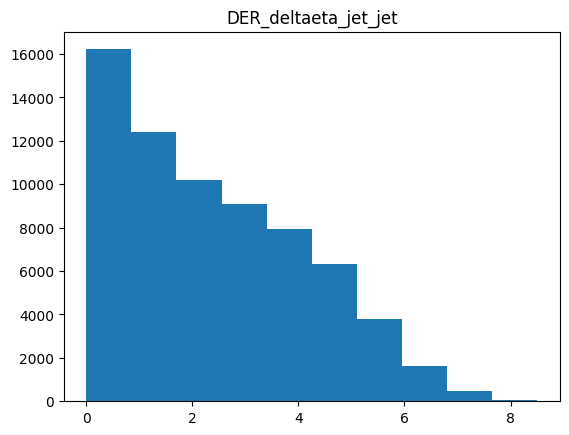

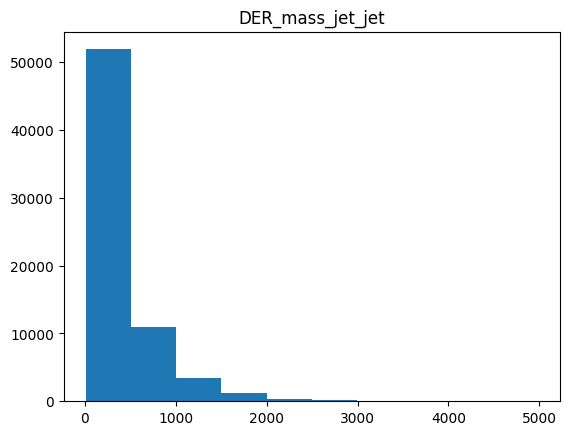

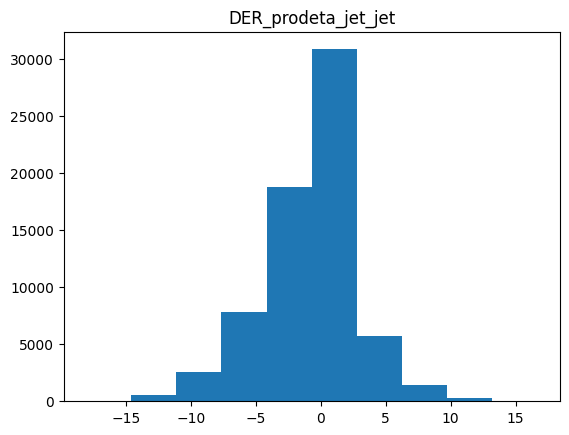

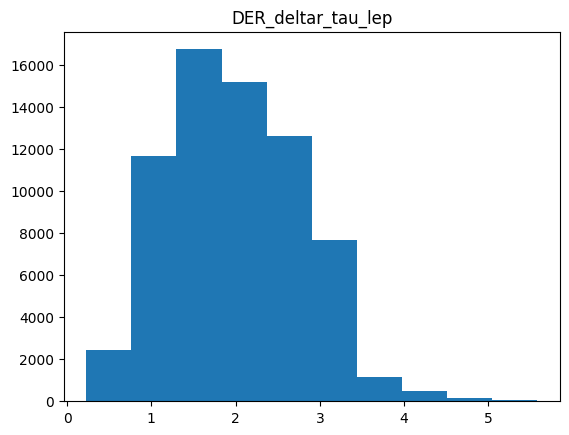

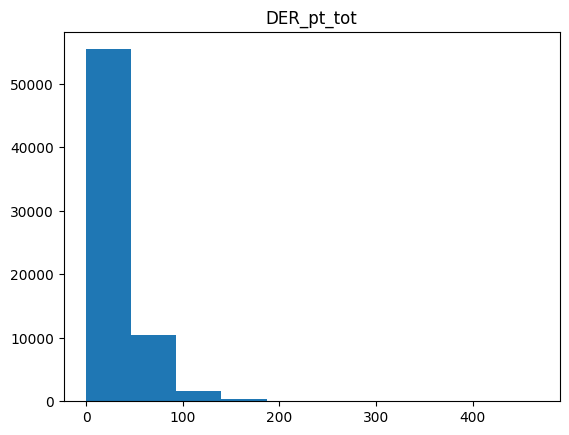

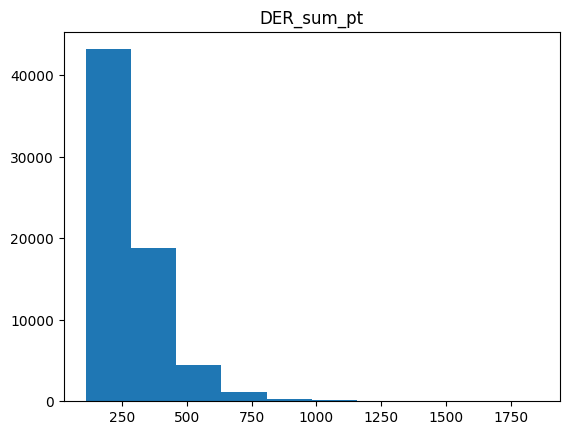

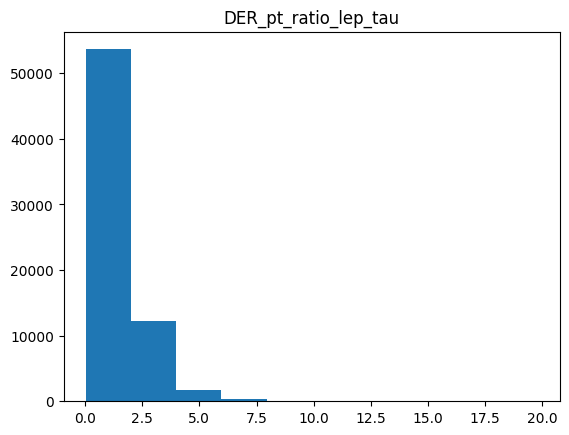

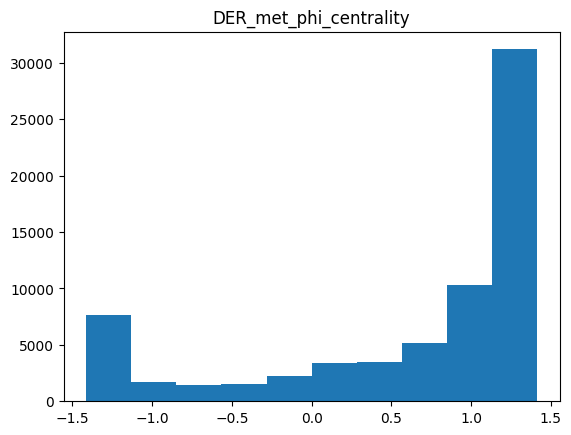

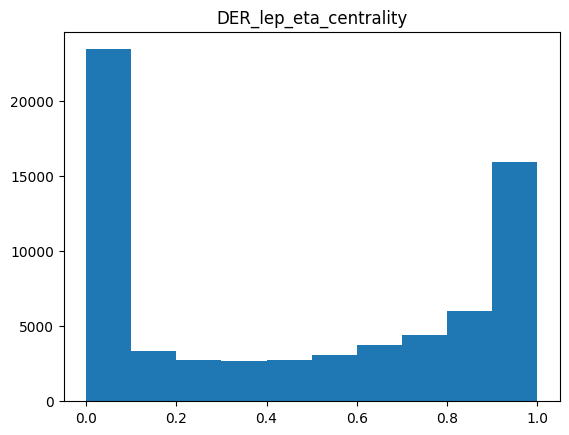

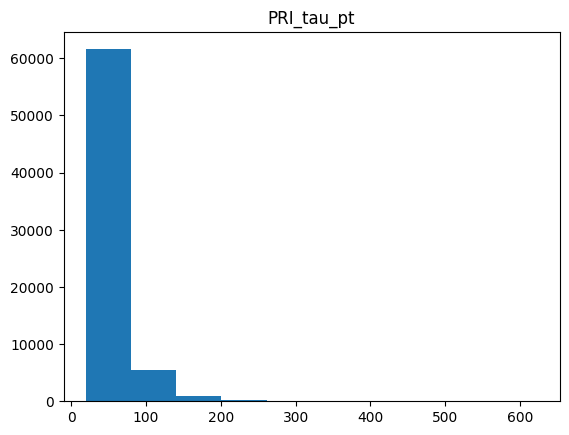

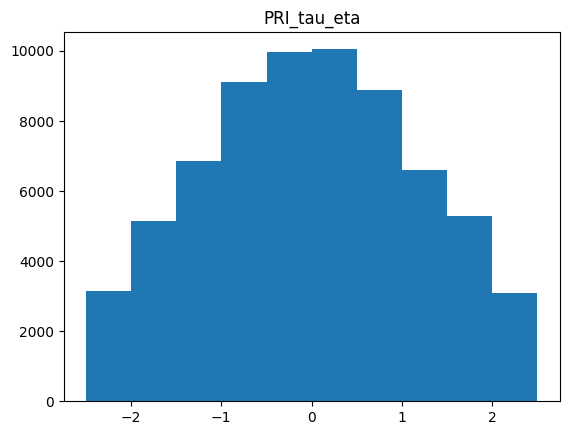

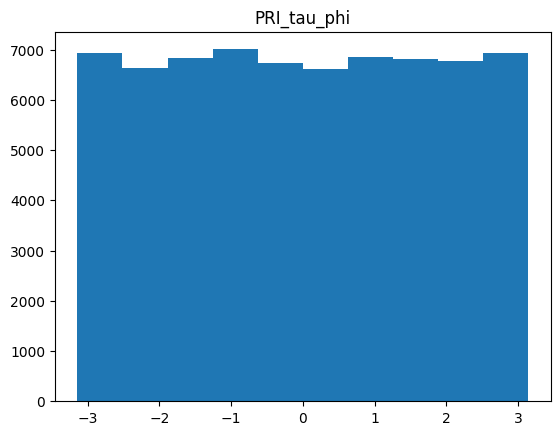

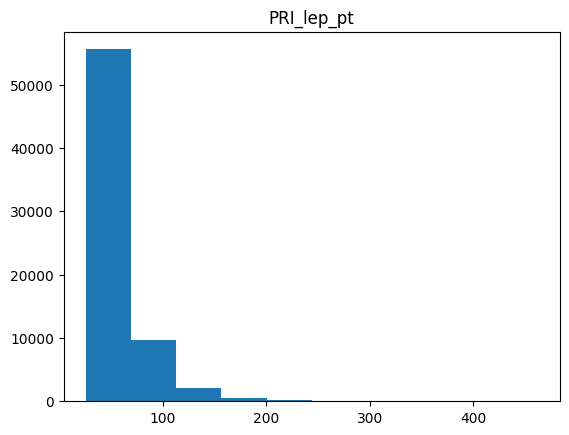

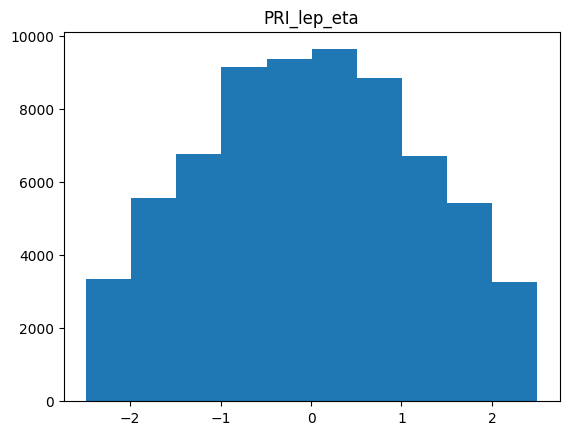

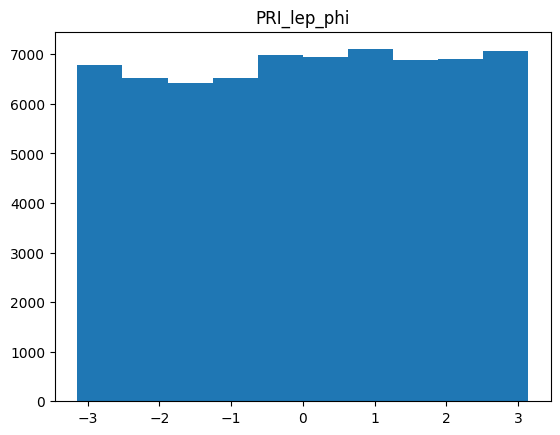

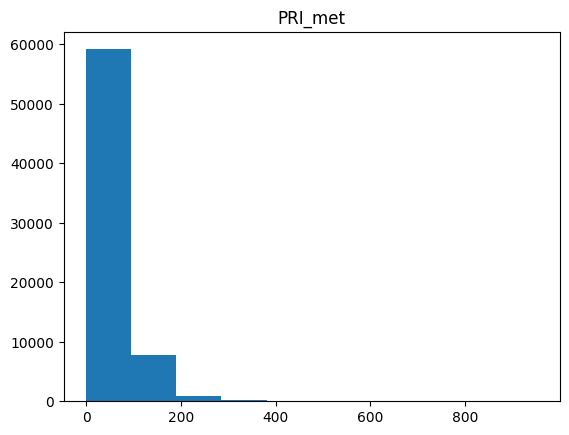

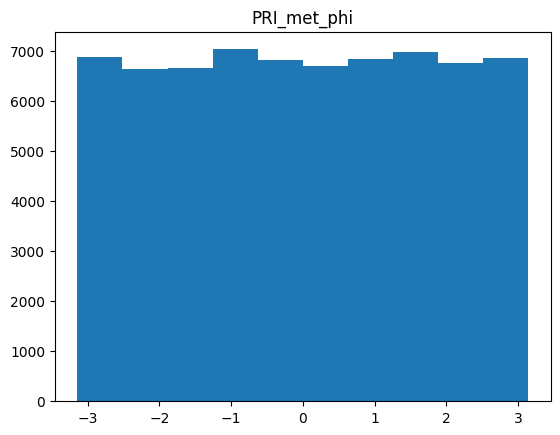

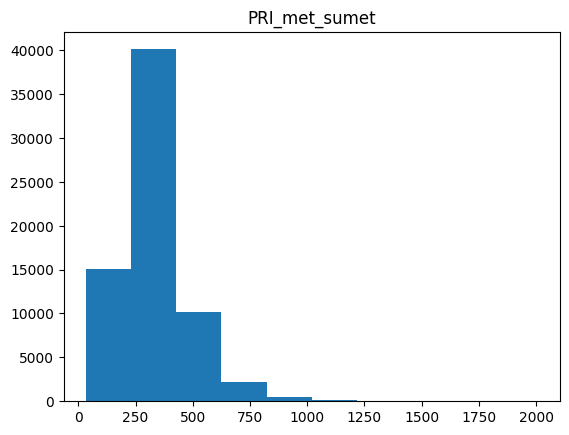

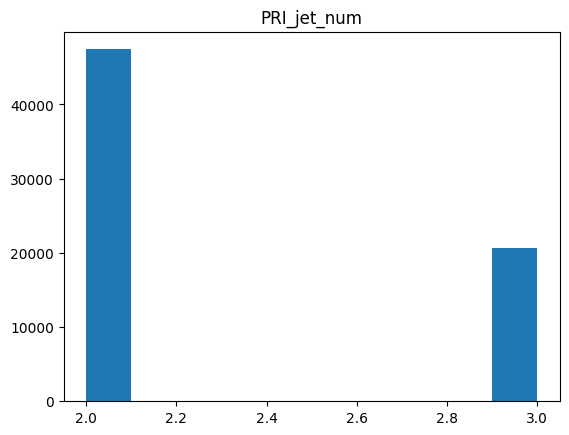

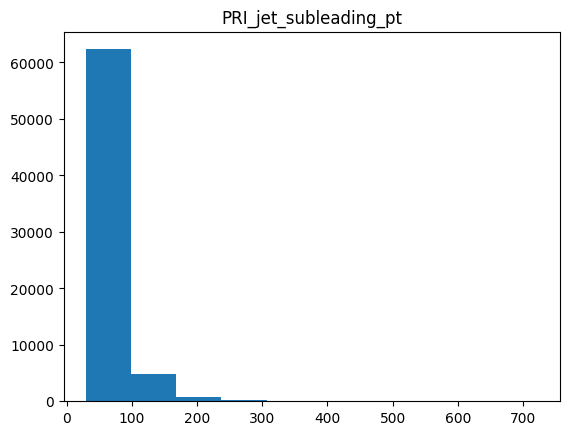

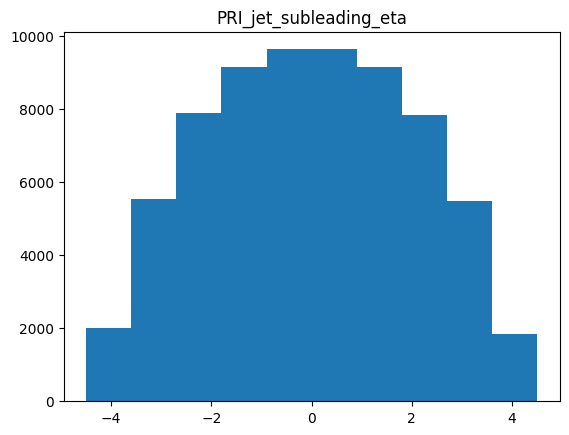

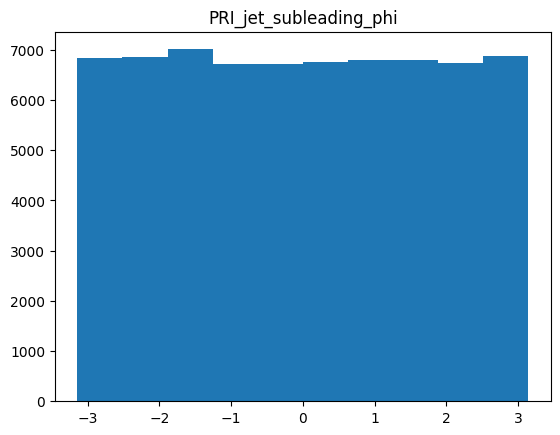

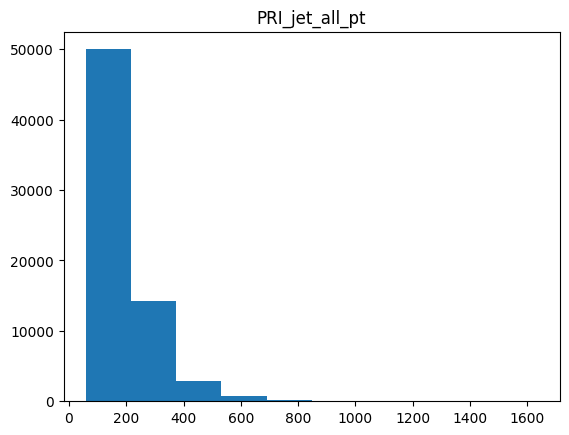

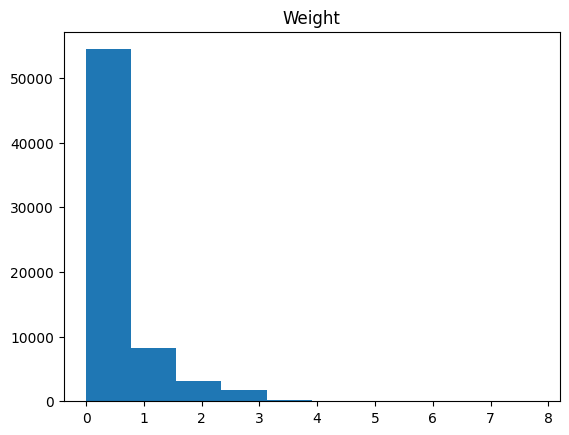

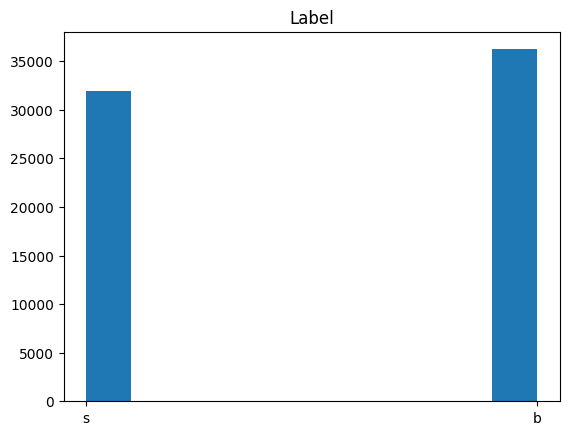

In [ ]:
for c in higgsclean.columns:
  pl.figure()
  pl.hist(higgsclean[c])
  pl.title(c)

In [ ]:
dastain = higgsclean.drop(["EventId", "Label", "PRI_jet_num"], axis=1)


In [ ]:
from sklearn import manifold
manifold.TSNE?

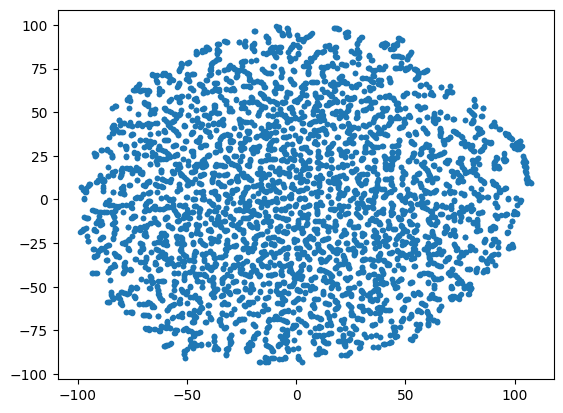

In [ ]:
X_emb = manifold.TSNE(n_components=2,  perplexity=3.0, early_exaggeration=20,
                      random_state=302).fit_transform(dastain.iloc[::10])
X_emb 
pl.plot(X_emb[:,0], X_emb[:,1], '.')

In [ ]:

X_emb = manifold.TSNE(n_components=2,  perplexity=30.0,
                      random_state=302).fit_transform(dastain.iloc[::10])
X_emb 

array([[-44.950596 ,  -7.727552 ],
       [ 10.845463 ,  28.517738 ],
       [ 21.695244 , -21.424448 ],
       ...,
       [-45.026558 ,   1.5005695],
       [  6.5741487,  52.3309   ],
       [-56.503525 , -23.138706 ]], dtype=float32)

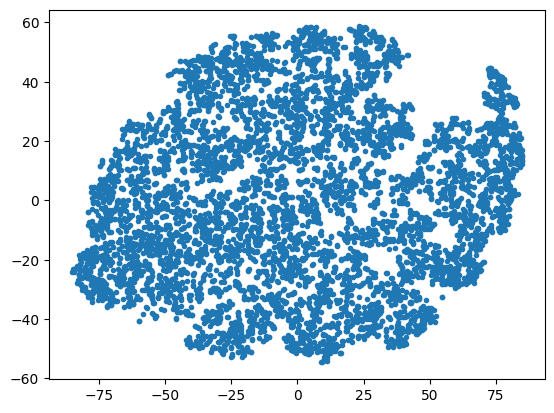

In [ ]:
pl.plot(X_emb[:,0], X_emb[:,1], '.')

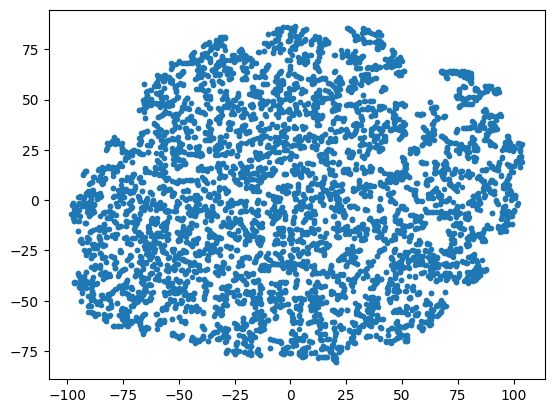

In [ ]:

X_emb = manifold.TSNE(n_components=2,  perplexity=10.0,
                      random_state=302).fit_transform(dastain.iloc[::10])
X_emb 
pl.plot(X_emb[:,0], X_emb[:,1], '.')

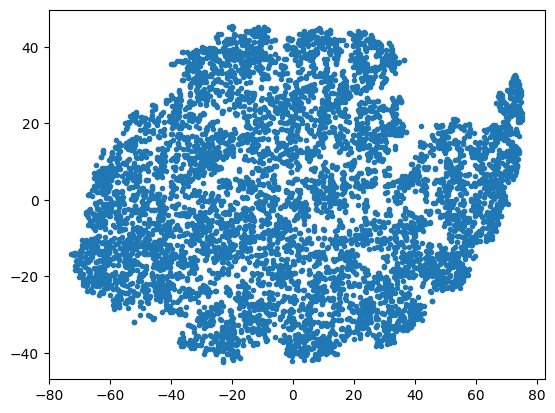

In [ ]:

X_emb = manifold.TSNE(n_components=2,  perplexity=50.0,
                      random_state=302).fit_transform(dastain.iloc[::10])
X_emb 
pl.plot(X_emb[:,0], X_emb[:,1], '.')

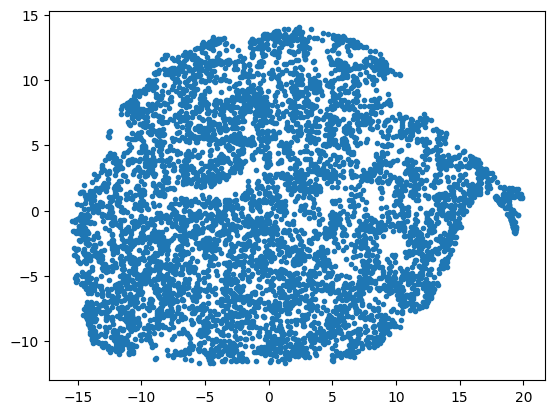

In [ ]:

X_emb = manifold.TSNE(learning_rate=2, n_components=2,  perplexity=50.0,
                      random_state=302).fit_transform(dastain.iloc[::10])
X_emb 
pl.plot(X_emb[:,0], X_emb[:,1], '.')

In [ ]:
import time
import matplotlib.cm as cm
import matplotlib.colors as colors
time.ctime()

In [ ]:
color = (higgsclean.Label == "s").astype(int)
scalarMap = cm.ScalarMappable(norm=Normalize(vmin=0,vmax=2), cmap="hot")
colors = [scalarMap.to_rgba(i) for i in color]

p=3 at Tue Apr 18 09:24:04 2023
e=5 at Tue Apr 18 09:24:04 2023
e=10 at Tue Apr 18 09:24:10 2023
e=100 at Tue Apr 18 09:24:20 2023
e=500 at Tue Apr 18 09:24:30 2023
p=10 at Tue Apr 18 09:24:39 2023
e=5 at Tue Apr 18 09:24:39 2023
e=10 at Tue Apr 18 09:24:49 2023
e=100 at Tue Apr 18 09:25:00 2023
e=500 at Tue Apr 18 09:25:10 2023
p=30 at Tue Apr 18 09:25:17 2023
e=5 at Tue Apr 18 09:25:17 2023
e=10 at Tue Apr 18 09:25:29 2023
e=100 at Tue Apr 18 09:25:41 2023
e=500 at Tue Apr 18 09:25:53 2023
p=50 at Tue Apr 18 09:26:04 2023
e=5 at Tue Apr 18 09:26:04 2023
e=10 at Tue Apr 18 09:26:17 2023
e=100 at Tue Apr 18 09:26:31 2023
e=500 at Tue Apr 18 09:26:44 2023


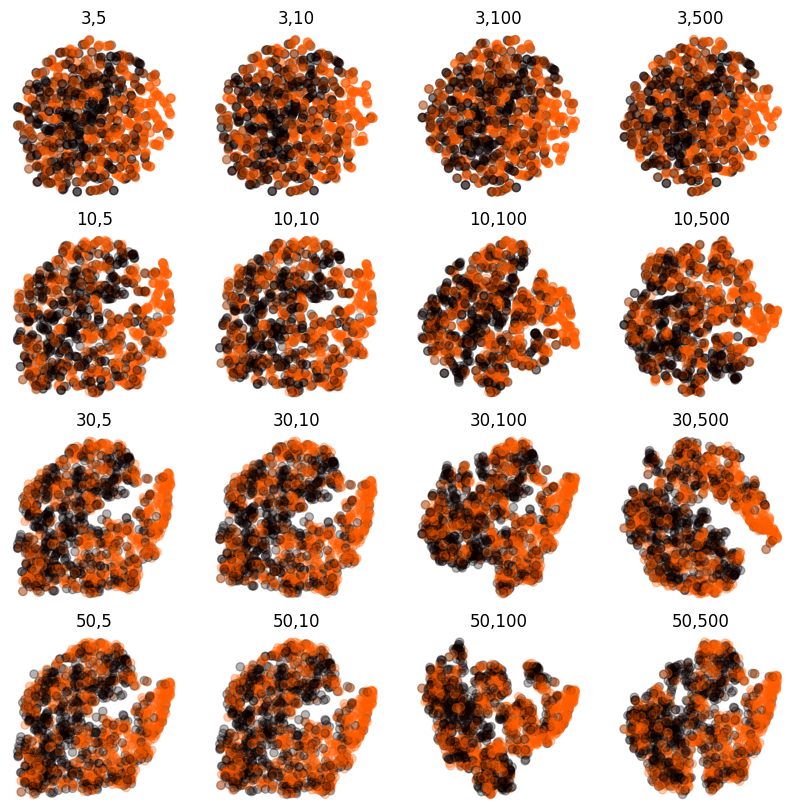

In [ ]:
skip = 50

fig = pl.figure(figsize=(10,10))

for i,p in enumerate([3,10,30,50]):
  print("p={} at {}".format(p, time.ctime()))
  for j,ex in enumerate([5,10,100,500]):
    print("e={} at {}".format(ex, time.ctime()))
    ax = fig.add_subplot(4,4,i*4 + j + 1)
    X_emb = manifold.TSNE(learning_rate=2, n_components=2,  perplexity=p, 
                      early_exaggeration=ex, 
                      random_state=int(i*j)+100,
                     ).fit_transform(dastain.iloc[::skip])
    ax.scatter(X_emb[:,0], X_emb[:,1], c=colors[::skip], alpha=0.3)
    pl.title("%d,%d"%(p, ex))
    pl.axis('off')

p=3 at Tue Apr 18 09:28:14 2023
p=10 at Tue Apr 18 09:32:27 2023
p=30 at Tue Apr 18 09:36:39 2023
p=50 at Tue Apr 18 09:41:27 2023


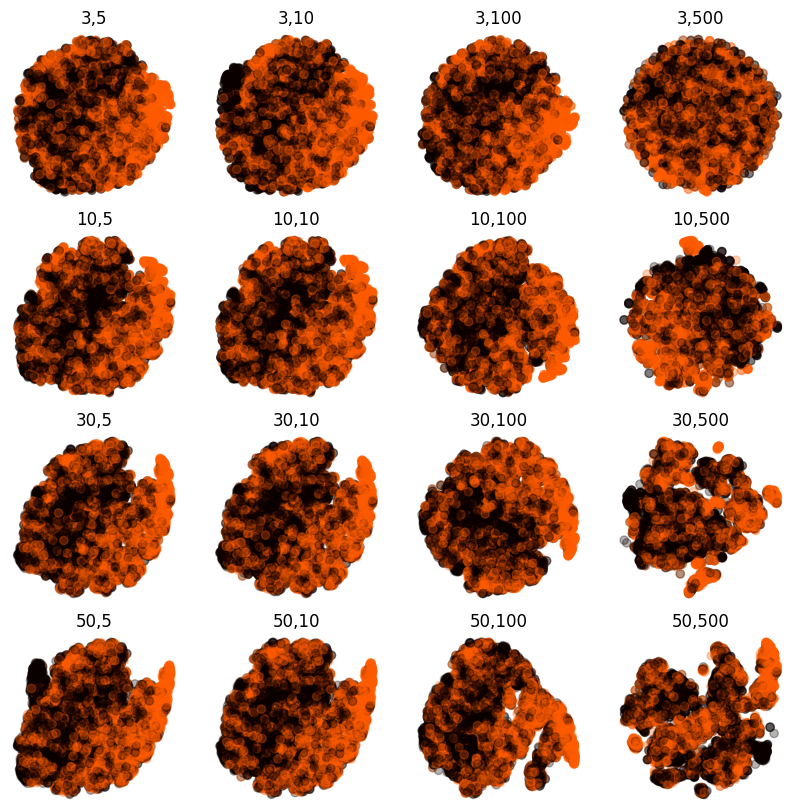

In [ ]:
skip = 10

fig = pl.figure(figsize=(10,10))

for i,p in enumerate([3,10,30,50]):
  print("p={} at {}".format(p, time.ctime()))
  for j,ex in enumerate([5,10,100,500]):
    print("e={} at {}".format(ex, time.ctime()))
    ax = fig.add_subplot(4,4,i*4 + j + 1)
    X_emb = manifold.TSNE(n_components=2,  perplexity=p, 
                      early_exaggeration=ex, random_state=302
                      ).fit_transform(dastain.iloc[::skip])
    ax.scatter(X_emb[:,0], X_emb[:,1], c=colors[::skip], alpha=0.3)
    pl.title("%d,%d"%(p, ex))
    pl.axis('off')

l=3 at Tue Apr 18 10:52:54 2023
e=5 at Tue Apr 18 10:52:54 2023
e=10 at Tue Apr 18 10:54:26 2023


KeyboardInterrupt: ignored

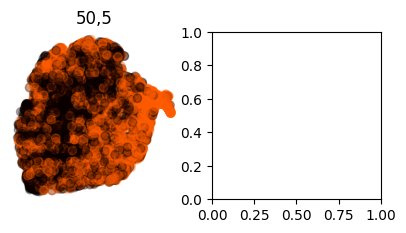

In [ ]:
skip = 10

fig = pl.figure(figsize=(10,10))

for i,l in enumerate([3,30,300,3000]):
  print("l={} at {}".format(l, time.ctime()))
  for j,ex in enumerate([5,10,100,500]):
    print("e={} at {}".format(ex, time.ctime()))
    ax = fig.add_subplot(4,4,i*4 + j + 1)
    X_emb = manifold.TSNE(learning_rate=l,
                          n_components=2,  perplexity=50, 
                      early_exaggeration=ex, random_state=302
                      ).fit_transform(dastain.iloc[::skip])
    ax.scatter(X_emb[:,0], X_emb[:,1], c=colors[::skip], alpha=0.3)
    pl.title("%d,%d"%(p, ex))
    pl.axis('off')